<p style="text-align:center;">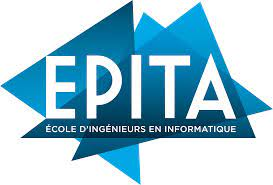
</p>


# Part 1. Keywords Extraction (14 points)

## What is Keyword Extraction?

Keyword extraction is defined as the task that automatically identifies a set of the terms that best describe the subject of document. This is an important method in information retrieval (IR) systems: keywords simplify and speed up the search. Keyword extraction can be used to reduce the dimensionality of text for further text analysis (text classification ot topic modeling). S.Art et al., for example, extracted keywords to measure patent similarity. Using keyword extraction, you can automatically index data, summarize a text, or generate tag clouds with the most representative keywords.

## How to extract the keywords?
All keyword extraction algorithms include the following steps:

* Candidate generation. Detection of possible candidate keywords from the text.
* Property calculation. Computation of properties and statistics required for ranking.
* Ranking. Computation of a score for each candidate keyword and sorting in descending order of all candidates. The top n candidates are finally selected as the n keywords representing the text.

In [1]:
# all the imports 

import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd 
import os

from IPython.core.display import HTML


from collections import Counter

## Goal.

In the following, given a paper, we will extract the keywords associated to this paper. Each individual can have their own qualitative assessment of what is "key" word. However, we will try as much as possible to objectify the approach and quantify to what extent a keyword is indeed key to the paper in question. 

## Loading data

In [2]:
%%capture
! git clone https://github.com/MastafaF/ExtractKeywords.git

In [3]:
import os 

os.listdir("./ExtractKeywords")

['README.md', 'LICENSE', '.git', 'data.tar.gz']

In [4]:
# Extract data file 

! cd ExtractKeywords && tar -zxvf data.tar.gz data

data/
data/papers.csv


In [5]:
# load the dataset
df = pd.read_csv('./ExtractKeywords/data/papers.csv')
df.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


## Preprocessing data 

In [6]:
# For the Lemmatizer 
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Question 1.1: Preprocessing data in a meaningful way [code] (2 points)

In [7]:
import re
from gensim.parsing.preprocessing import STOPWORDS


# Me 
from gensim.parsing import preprocess_string, strip_short, strip_tags, strip_numeric, strip_multiple_whitespaces, stem_text, strip_punctuation, remove_stopwords

# Update stop words accordingly
#my_stop_words = STOPWORDS.union(set(['mystopword1', 'mystopword2']))
my_stop_words = STOPWORDS.union(set(['\n', '~\n\n']))

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

##Creating a list of custom stopwords
new_words = ["fig","figure","image","sample","using", 
             "show", "result", "large", 
             "also", "one", "two", "three", 
             "four", "five", "seven","eight","nine"]

stop_words = STOPWORDS.union(set(new_words))

def pre_process(text):
  # ------------------
  # Write your implementation here.

  CUSTOM_FILTERS = [
    lambda s: s.lower(),
    lambda s: re.sub(r'\s+\w{1}\s+', ' ', s),
    strip_tags,
    strip_numeric,
    strip_punctuation, 
    strip_multiple_whitespaces,
    strip_short,
    #remove_stopwords, # Removes all English generic stopwords
  ]

  text = preprocess_string(text, CUSTOM_FILTERS)

  lemmatized_text = []
  wnl = WordNetLemmatizer()
  for word in text:
    lemmatized_text.append(wnl.lemmatize(word))

  text_wo_stopwords = [word for word in lemmatized_text if not word in stop_words]
  final_text = ' '.join(text_wo_stopwords)
  
  return final_text

  # ------------------

In [8]:
%%time
df['preproc_text'] = df['paper_text'].apply(pre_process)

CPU times: user 2min 14s, sys: 531 ms, total: 2min 15s
Wall time: 2min 25s


In [9]:
# Visualizing data 
HTML(pd.DataFrame(df.loc[0, ["preproc_text"]]).to_html())

## 0. Raw counts



### Question 1.2: Build a top N words based on occurence [code] (1 point)

In [10]:
"""
Idea: 

0. Split with spacy OR nltk 

1. Counter 

2. Surface top 10 

"""

def get_counter(txt_preproc, N=10): 

    # ------------------
    # Write your implementation here.
    
    tokens = nltk.word_tokenize(txt_preproc)
    count_tokens = nltk.FreqDist(tokens)

    count_tokens_list = list(dict(count_tokens).items())
    count_tokens_list.sort(key=lambda ele: ele[1], reverse=True)

    return count_tokens_list[:10]
    # ------------------

df["Top N"] = df["preproc_text"].apply(get_counter)

In [11]:
df

,id,year,title,event_type,pdf_name,abstract,paper_text,preproc_text,Top N
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...,self organization associative database applica...,"[(robot, 23), (database, 19), (let, 18), (lear..."
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...,mean field theory layer visual cortex applicat...,"[(cell, 51), (network, 42), (cortical, 32), (s..."
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...,storing covariance associative long term poten...,"[(input, 58), (weak, 42), (synaptic, 36), (ass..."
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...,bayesian query construction neural network mod...,"[(loss, 42), (query, 25), (model, 23), (functi..."
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a...",neural network ensemble cross validation activ...,"[(ensemble, 56), (network, 52), (error, 51), (..."
...,...,...,...,...,...,...,...,...,...
7236,994,1994,Single Transistor Learning Synapses,NaN,994-single-transistor-learning-synapses.pdf,Abstract Missing,Single Transistor Learning Synapses\n\nPaul Ha...,single transistor learning synapsis paul hasle...,"[(gate, 44), (weight, 42), (synapse, 42), (cur..."
7237,996,1994,"Bias, Variance and the Combination of Least Sq...",NaN,996-bias-variance-and-the-combination-of-least...,Abstract Missing,"Bias, Variance and the Combination of\nLeast S...",bias variance combination square estimator ron...,"[(estimator, 37), (variance, 29), (bias, 25), ..."
7238,997,1994,A Real Time Clustering CMOS Neural Engine,NaN,997-a-real-time-clustering-cmos-neural-engine.pdf,Abstract Missing,A Real Time Clustering CMOS\nNeural Engine\nT....,real time clustering cmos neural engine serran...,"[(current, 35), (chip, 21), (input, 19), (patt..."
7239,998,1994,Learning direction in global motion: two class...,NaN,998-learning-direction-in-global-motion-two-cl...,Abstract Missing,Learning direction in global motion: two\nclas...,learning direction global motion class psychop...,"[(learning, 69), (motion, 42), (direction, 32)..."


In [12]:
df.loc[2, "Top N"]

[('input', 58),
 ('weak', 42),
 ('synaptic', 36),
 ('associative', 35),
 ('ltp', 30),
 ('strong', 26),
 ('phase', 26),
 ('long', 24),
 ('stimulus', 23),
 ('hippocampus', 22)]

### Question 1.3: What are some of the limits of raw counts? How could we improve the approach through preprocessing? [written] (2 points)

Counting the number of times each word appears in a document is a very simple approach to text processing, but it has several limitations. First, it does not account for the order of the words in the document, so two documents with the same words in different orders will be considered to be identical. Second, it does not account for different forms of the same word, so "fish" and "fishing" will be considered to be different words. Third, raw counts could be very low for rare words, and this could also skew the similarity results. Finally, it does not account for the context of the words in the document, so two documents with the same words but different meanings will be considered to be identical.

One way to improve the approach is to use a technique called "stemming" to reduce each word to its base form before counting. This will account for different forms of the same word. Further, we could use a weighting scheme such as tf-idf. This will palliate rare words getting low scores and skewing the results. Another way to improve the approach is to use a technique called "stopword removal" to remove common words such as "a", "the", and "of" before counting. This will account for the context of the words in the document.

We've implemented in question 1.1 both the removal of stop words and the lemmatization which is the process of grouping together the different forms of a word so they can be analyzed as a single item.

## 1. TF-IDF

### Introduction.

TF-IDF stands for Text Frequency Inverse Document Frequency. The importance of each word increases proportionally to the number of times a word appears in the document (Text Frequency - TF) but is offset by the frequency of the word in the corpus (Inverse Document Frequency - IDF). Using the tf-idf weighting scheme, the keywords are the words with the higherst TF-IDF score.

### CountVectorizer to create a vocabulary and generate word counts

In [13]:
%%time
from sklearn.feature_extraction.text import CountVectorizer


#create a vocabulary of words, 
cv=CountVectorizer(max_df=0.95,         # ignore words that appear in 95% of documents
                   max_features=10000,  # the size of the vocabulary
                   ngram_range=(1,3)    # vocabulary contains single words, bigrams, trigrams
                  )


word_count_vector=cv.fit_transform(df["preproc_text"])

CPU times: user 2min 14s, sys: 4.74 s, total: 2min 19s
Wall time: 2min 19s


In [14]:
word_count_vector

<7241x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 5316905 stored elements in Compressed Sparse Row format>

### TfidfTransformer to Compute Inverse Document Frequency (IDF)

In [15]:
%%time
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer=TfidfTransformer(smooth_idf=True,
                                   use_idf=True)

tfidf_transformer.fit(word_count_vector)

CPU times: user 28.9 ms, sys: 988 µs, total: 29.9 ms
Wall time: 39.1 ms


TfidfTransformer()

In [16]:
tfidf_transformer

TfidfTransformer()

### Question 1.4: How can you find an optimal max_df? Why are we using a sparse matrix instead of a regular matrix? [written] (2 points)

The max_df parameter in a CountVectorizer indicates the maximum frequency of a word allowed in order to be included in the vocabulary. A higher max_df results in a smaller vocabulary.

One way to find an optimal max_df is to iterate over different values and compare the results. Another way is to use a grid search to test a range of values and find the best one.

There are a few reasons for using a sparse matrix with a CountVectorizer. First, a regular matrix requires a lot of memory, and a sparse matrix uses much less memory (because 0 values do not take up memory). Second, a sparse matrix can be created much faster than a regular matrix. Finally, a sparse matrix can be used with a much larger dataset than a regular matrix.

In [17]:
cv.transform([" change number node recognition rate defined relative frequency"])

<1x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 10 stored elements in Compressed Sparse Row format>

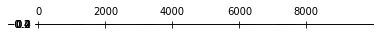

In [18]:
# Visualizing data 
from scipy.sparse import csr_matrix

plt.spy(csr_matrix(cv.transform(["change number node recognition rate defined relative frequency"])))

In [19]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform(["change number node recognition rate defined relative frequency"]))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

sorted_items

[(7360, 0.6332528462762741),
 (6110, 0.48592082711420476),
 (3282, 0.2823916239785495),
 (5971, 0.2677155552680803),
 (7348, 0.2262665323411533),
 (7490, 0.2242783939550881),
 (1179, 0.1963759835498492),
 (7270, 0.17762842408345383),
 (2062, 0.15648471115689686),
 (6087, 0.12391506848540515)]

In [20]:
coo_matrix = tf_idf_vector.tocoo()
#list(zip(coo_matrix.col, coo_matrix.data))
coo_matrix

<1x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in COOrdinate format>

In [21]:
# get feature names
feature_names=cv.get_feature_names()

def get_keywords(txt, top_N=10):

  # ------------------
  # Write your implementation here.

  # Get tf idf
  count_vector = cv.transform([txt]) 
  tf_idf_vector = tfidf_transformer.transform(count_vector)

  # get scores
  scores = np.asarray(tf_idf_vector.sum(axis=0)).ravel()
  scores_rounded = list(np.around(scores, 3))

  # Get keyword scores
  keyword_score =  list(zip(feature_names, scores_rounded))
  keyword_score.sort(key=lambda element: element[1], reverse=True)
  sorted_keyword_score = keyword_score[:top_N]
  # ------------------
  
  return sorted_keyword_score

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
get_keywords(txt="change number node recognition rate defined relative frequency")

[('recognition rate', 0.633),
 ('number node', 0.486),
 ('frequency', 0.282),
 ('node', 0.268),
 ('recognition', 0.226),
 ('relative', 0.224),
 ('change', 0.196),
 ('rate', 0.178),
 ('defined', 0.156),
 ('number', 0.124)]

### Compare Raw Counts to Tf-IDF approach

In [23]:
df["Top_N_TF-IDF"] = df["preproc_text"].apply(get_keywords, top_N=10)

In [24]:
comparator = list(df[['Top N', 'Top_N_TF-IDF']].iloc[1].values)

print(comparator[0])
print(comparator[1])

[('cell', 51), ('network', 42), ('cortical', 32), ('synapsis', 26), ('activity', 19), ('mean', 17), ('field', 17), ('eye', 17), ('layer', 13), ('single', 12)]
[('cell', 0.456), ('cortical', 0.365), ('synapsis', 0.342), ('mean field', 0.223), ('eye', 0.211), ('network', 0.197), ('lgn', 0.175), ('activity', 0.17), ('mean field approximation', 0.147), ('field approximation', 0.146)]


### Question 1.5: Find an example where there is a noticeable difference between tf-idf and raw counts? Justify which method you would choose yourself (there is no bad and good answer here) [written] (2 points)

In [25]:
comparator = list(df[['Top N', 'Top_N_TF-IDF']].iloc[4].values)

print(f'Raw counts: {comparator[0]}')
print(f'tf-idf : {comparator[1]}')

Raw counts: [('ensemble', 56), ('network', 52), ('error', 51), ('generalization', 40), ('set', 27), ('ambiguity', 26), ('weight', 26), ('learning', 22), ('training', 22), ('example', 22)]
tf-idf : [('ensemble', 0.525), ('generalization error', 0.356), ('ambiguity', 0.302), ('generalization', 0.232), ('network', 0.21), ('error', 0.203), ('active learning', 0.195), ('cross validation', 0.14), ('active', 0.136), ('individual', 0.125)]


We can see in this example (text 4) that the general words look similar. Although, upon inspection we realise that the words from `Raw counts` lack context and meaning for example we see `learning` as a keyword but what learning are we talking about machine learning, active learning, ...? On the other end, tf-idf is able to classify `active learning` as one of its keywords which actually gives more information on the contents of the article! We can further see those differences with `error` and `generalization error`.

Overall at least on this example, tf-idf seems to give way more context than raw counts and seems to be a much better choice in this particular case.

Although we can generalise this observersation as: raw counts are the number of times a term appears in a document which appear relatively naive. tf-idf is a measure of how important a term is to a document in a collection of documents which seems to be a more complete overview. It is the product of the term's raw count and a document frequency weight. tf-idf is thus better because it takes into account how often a term appears in a document.

## 2. KeyBERT

### 2.0. Installation

In [26]:
%%capture
pip install keybert

In [27]:
%%capture
from keybert import KeyBERT

doc = """
         Supervised learning is the machine learning task of learning a function that
         maps an input to an output based on example input-output pairs. It infers a
         function from labeled training data consisting of a set of training examples.
         In supervised learning, each example is a pair consisting of an input object
         (typically a vector) and a desired output value (also called the supervisory signal). 
         A supervised learning algorithm analyzes the training data and produces an inferred function, 
         which can be used for mapping new examples. An optimal scenario will allow for the 
         algorithm to correctly determine the class labels for unseen instances. This requires 
         the learning algorithm to generalize from the training data to unseen situations in a 
         'reasonable' way (see inductive bias).
      """
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)

In [28]:
keywords

[('supervised', 0.6676),
 ('labeled', 0.4896),
 ('learning', 0.4813),
 ('training', 0.4134),
 ('labels', 0.3947)]

### Question 2.1. Apply KeyBERT to the a sample of the dataset [code] (1 point)

In [29]:
df_ = df.sample(100)
df_.sample(1)

,id,year,title,event_type,pdf_name,abstract,paper_text,preproc_text,Top N,Top_N_TF-IDF
2263,3054,2006,Clustering appearance and shape by learning ji...,NaN,3054-clustering-appearance-and-shape-by-learni...,Abstract Missing,Clustering appearance and shape by learning ji...,clustering appearance shape learning jigsaw an...,"[(jigsaw, 120), (model, 71), (piece, 51), (pat...","[(piece, 0.449), (epitome, 0.414), (patch, 0.3..."


In [30]:
%%time
%%capture

# ------------------
# Write your implementation here.

kw_model = KeyBERT()

def get_key_bert_keywords(text):
  keywords = kw_model.extract_keywords(text)

  return keywords

df_["Top_N_KeyBERT_1"] = df_["preproc_text"].apply(get_key_bert_keywords)
# ------------------

CPU times: user 3min 41s, sys: 17.1 s, total: 3min 58s
Wall time: 3min 56s


In [31]:
df_

,id,year,title,event_type,pdf_name,abstract,paper_text,preproc_text,Top N,Top_N_TF-IDF,Top_N_KeyBERT_1
2628,3383,2008,Spectral Hashing,NaN,3383-spectral-hashing.pdf,Semantic hashing seeks compact binary codes of...,"Spectral Hashing\n\n3\n\nYair Weiss1,3\nSchool...",spectral hashing yair wei school science hebre...,"[(code, 55), (bit, 54), (spectral, 38), (hashi...","[(hashing, 0.386), (bit, 0.341), (eigenfunctio...","[(hashing, 0.5136), (codewords, 0.4106), (retr..."
5828,6273,2016,Fundamental Limits of Budget-Fidelity Trade-of...,Poster,6273-fundamental-limits-of-budget-fidelity-tra...,Digital crowdsourcing (CS) is a modern approac...,Fundamental Limits of Budget-Fidelity Trade-of...,fundamental limit budget fidelity trade label ...,"[(worker, 59), (query, 58), (crowdsourcing, 41...","[(worker, 0.525), (crowdsourcing, 0.42), (quer...","[(crowdsourcing, 0.5045), (crowdsourcer, 0.495..."
5844,6288,2016,Split LBI: An Iterative Regularization Path wi...,Poster,6288-split-lbi-an-iterative-regularization-pat...,An iterative regularization path with structur...,Split LBI: An Iterative Regularization Path wi...,split lbi iterative regularization path struct...,"[(lasso, 44), (path, 30), (lbi, 29), (split, 2...","[(lasso, 0.507), (consistency, 0.255), (path, ...","[(lasso, 0.4529), (regularization, 0.422), (re..."
7153,916,1994,An Actor/Critic Algorithm that is Equivalent t...,NaN,916-an-actorcritic-algorithm-that-is-equivalen...,Abstract Missing,An Actor/Critic Algorithm that\nEquivalent to ...,actor critic algorithm equivalent learning rob...,"[(actor, 41), (critic, 41), (algorithm, 38), (...","[(critic, 0.514), (actor, 0.494), (actor criti...","[(reinforcement, 0.4622), (critic, 0.41), (ada..."
4316,4906,2013,Convex Calibrated Surrogates for Low-Rank Loss...,Spotlight,4906-convex-calibrated-surrogates-for-low-rank...,"The design of convex, calibrated surrogate los...",Convex Calibrated Surrogates for Low-Rank Loss...,convex calibrated surrogate low rank loss matr...,"[(surrogate, 76), (loss, 66), (calibrated, 45)...","[(surrogate, 0.568), (pred, 0.443), (calibrate...","[(convex, 0.3066), (optimization, 0.3048), (mu..."
...,...,...,...,...,...,...,...,...,...,...,...
5570,6040,2016,Stochastic Gradient Methods for Distributional...,Poster,6040-stochastic-gradient-methods-for-distribut...,We develop efficient solution methods for a ro...,Stochastic Gradient Methods for Distributional...,stochastic gradient method distributionally ro...,"[(algorithm, 37), (robust, 31), (problem, 27),...","[(regret, 0.268), (robust, 0.246), (convex, 0....","[(optimizer, 0.3316), (optimization, 0.3129), ..."
1784,2620,2004,Learning Efficient Auditory Codes Using Spikes...,NaN,2620-learning-efficient-auditory-codes-using-s...,Abstract Missing,Learning efficient auditory codes using spikes...,learning efficient auditory code spike predict...,"[(kernel, 54), (function, 47), (signal, 40), (...","[(spike, 0.352), (kernel, 0.326), (kernel func...","[(auditory, 0.5245), (cochlear, 0.5083), (coch..."
4179,4783,2012,Optimal Neural Tuning Curves for Arbitrary Sti...,NaN,4783-optimal-neural-tuning-curves-for-arbitrar...,In this work we study how the stimulus distrib...,Optimal Neural Tuning Curves for Arbitrary\nSt...,optimal neural tuning curve arbitrary stimulus...,"[(tuning, 44), (information, 43), (curve, 41),...","[(tuning curve, 0.505), (tuning, 0.314), (curv...","[(neuron, 0.3313), (neuronal, 0.3308), (optimi..."
3653,4308,2011,Statistical Tests for Optimization Efficiency,NaN,4308-statistical-tests-for-optimization-effici...,Learning problems such as logistic regression ...,Statistical Tests for Optimization Efficiency\...,statistical test optimization efficiency levi ...,"[(algorithm, 32), (loss, 29), (learning, 27), ...","[(sgd, 0.407), (loss, 0.225), (regularized, 0....","[(optimizers, 0.4044), (optimize, 0.3705), (op..."


In [34]:
# TODO: compare the same paper example across the 3 methods 

idx_focus = 1271 

print(f'Keybert: {df_.loc[idx_focus, "Top_N_KeyBERT_1"]}')
print(f'TF-IDF: {df_.loc[idx_focus, "Top_N_TF-IDF"]}')
print(f'Top N: {df_.loc[idx_focus, "Top N"]}') 

KeyError: ignored

### Question 1.6. Comparison of multilple techniques [written] (4 points)

1. Draw a table of the solution, the quality score that you defined and the time taken to find keywords across a sample of 1000 of the original dataset. 
2. Can you think of tweaks to reduce time to compute? If yes, add an additional column to the above table with your proposed tweaks.
3. Based on the above table and  lecture 1, what do you think is the most appropriate solution for keywords extraction? Why? 

# TODOOOOOOOOOO

# Part 2. Word Vectors (10 points)

In [35]:
import sys

import numpy as np

from gensim.models import KeyedVectors
from gensim.test.utils import datapath
import pprint
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import nltk
nltk.download('reuters')
from nltk.corpus import reuters
import numpy as np
import random
import scipy as sp
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

START_TOKEN = '<START>'
END_TOKEN = '<END>'

np.random.seed(0)
random.seed(0)

[nltk_data] Downloading package reuters to /root/nltk_data...


Word Vectors are often used as a fundamental component for downstream NLP tasks, e.g. question answering, text generation, translation, etc., so it is important to build some intuitions as to their strengths and weaknesses. Here, you will explore two types of word vectors: those derived from co-occurrence matrices, and those derived via GloVe.

Note on Terminology: The terms "word vectors" and "word embeddings" are often used interchangeably. The term "embedding" refers to the fact that we are encoding aspects of a word's meaning in a lower dimensional space. As Wikipedia states, "conceptually it involves a mathematical embedding from a space with one dimension per word to a continuous vector space with a much lower dimension".

## Count-Based Word Vectors

Most word vector models start from the following idea:

You shall know a word by the company it keeps (Firth, J. R. 1957:11)

Many word vector implementations are driven by the idea that similar words, i.e., (near) synonyms, will be used in similar contexts. As a result, similar words will often be spoken or written along with a shared subset of words, i.e., contexts. By examining these contexts, we can try to develop embeddings for our words. With this intuition in mind, many "old school" approaches to constructing word vectors relied on word counts. Here we elaborate upon one of those strategies, co-occurrence matrices.



## Plotting Co-Occurrence Word Embeddings


Here, we will be using the Reuters (business and financial news) corpus. If you haven't run the import cell at the top of this page, please run it now (click it and press SHIFT-RETURN). The corpus consists of 10,788 news documents totaling 1.3 million words. These documents span 90 categories and are split into train and test. For more details, please see https://www.nltk.org/book/ch02.html. We provide a read_corpus function below that pulls out only articles from the "crude" (i.e. news articles about oil, gas, etc.) category. The function also adds <START> and <END> tokens to each of the documents, and lowercases words. You do not have to perform any other kind of pre-processing.

In [36]:
def read_corpus(category="crude"):
    """ Read files from the specified Reuter's category.
        Params:
            category (string): category name
        Return:
            list of lists, with words from each of the processed files
    """
    files = reuters.fileids(category)
    return [[START_TOKEN] + [w.lower() for w in list(reuters.words(f))] + [END_TOKEN] for f in files]

Let's have a look what these documents are like….

In [37]:
reuters_corpus = read_corpus()
pprint.pprint(reuters_corpus[:3], compact=True, width=100)

[['<START>', 'japan', 'to', 'revise', 'long', '-', 'term', 'energy', 'demand', 'downwards', 'the',
  'ministry', 'of', 'international', 'trade', 'and', 'industry', '(', 'miti', ')', 'will', 'revise',
  'its', 'long', '-', 'term', 'energy', 'supply', '/', 'demand', 'outlook', 'by', 'august', 'to',
  'meet', 'a', 'forecast', 'downtrend', 'in', 'japanese', 'energy', 'demand', ',', 'ministry',
  'officials', 'said', '.', 'miti', 'is', 'expected', 'to', 'lower', 'the', 'projection', 'for',
  'primary', 'energy', 'supplies', 'in', 'the', 'year', '2000', 'to', '550', 'mln', 'kilolitres',
  '(', 'kl', ')', 'from', '600', 'mln', ',', 'they', 'said', '.', 'the', 'decision', 'follows',
  'the', 'emergence', 'of', 'structural', 'changes', 'in', 'japanese', 'industry', 'following',
  'the', 'rise', 'in', 'the', 'value', 'of', 'the', 'yen', 'and', 'a', 'decline', 'in', 'domestic',
  'electric', 'power', 'demand', '.', 'miti', 'is', 'planning', 'to', 'work', 'out', 'a', 'revised',
  'energy', 'supply

### Question 2.1: Implement distinct_words [code] (2 points)

Write a method to work out the distinct words (word types) that occur in the corpus. You can do this with for loops, but it's more efficient to do it with Python list comprehensions. In particular, this may be useful to flatten a list of lists. If you're not familiar with Python list comprehensions in general, here's more information.

Your returned corpus_words should be sorted. You can use python's sorted function for this.

You may find it useful to use Python sets to remove duplicate words.

In [38]:
def distinct_words(corpus):
    """ Determine a list of distinct words for the corpus.
        Params:
            corpus (list of list of strings): corpus of documents - eg [["hey", "I", "am", "toto"], ["hey", "I", "am", "tata"]]
        Return:
            corpus_words (list of strings): sorted list of distinct words across the corpus
            num_corpus_words (integer): number of distinct words across the corpus
    """
    corpus_words = []
    num_corpus_words = -1
    
    # ------------------
    # Write your implementation here.w
    #flattened_corpus = np.array(corpus, dtype=object).flatten()
    flattened_corpus = np.concatenate(corpus).ravel()

    #print(set(map(tuple, flattened_corpus)))
    unique_flat_corpus = list(set(flattened_corpus))
    
    corpus_words = sorted(unique_flat_corpus)
    num_corpus_words = len(corpus_words)
    # ------------------

    return corpus_words, num_corpus_words

In [39]:
# ---------------------
# Run this sanity check
# Note that this not an exhaustive check for correctness.
# ---------------------

# Define toy corpus
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
test_corpus_words, num_corpus_words = distinct_words(test_corpus)

# Correct answers
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
ans_num_corpus_words = len(ans_test_corpus_words)

# Test correct number of words
assert(num_corpus_words == ans_num_corpus_words), "Incorrect number of distinct words. Correct: {}. Yours: {}".format(ans_num_corpus_words, num_corpus_words)

# Test correct words
assert (test_corpus_words == ans_test_corpus_words), "Incorrect corpus_words.\nCorrect: {}\nYours:   {}".format(str(ans_test_corpus_words), str(test_corpus_words))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


### Question 2.2: Implement compute_co_occurrence_matrix [code] (3 points)

Write a method that constructs a co-occurrence matrix for a certain window-size  n  (with a default of 4), considering words  n  before and  n  after the word in the center of the window. Here, we start to use numpy (np) to represent vectors, matrices, and tensors

In [40]:
from nltk.tag.mapping import join
from collections import defaultdict
from collections import Counter 

def compute_co_occurrence_matrix(corpus, window_size=4):
    """ Compute co-occurrence matrix for the given corpus and window_size (default of 4).
    
        Note: Each word in a document should be at the center of a window. Words near edges will have a smaller
              number of co-occurring words.
              
              For example, if we take the document "<START> All that glitters is not gold <END>" with window size of 4,
              "All" will co-occur with "<START>", "that", "glitters", "is", and "not".
    
        Params:
            corpus (list of list of strings): corpus of documents
            window_size (int): size of context window
        Return:
            M (a symmetric numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): 
                Co-occurence matrix of word counts. 
                The ordering of the words in the rows/columns should be the same as the ordering of the words given by the distinct_words function.
            word2ind (dict): dictionary that maps word to index (i.e. row/column number) for matrix M.
    """
    words, num_words = distinct_words(corpus)
    M = None
    word2ind = {}
    
    # ------------------
    # Write your implementation here.
    corpus_words, num_corpus_words  = distinct_words(corpus)

    M = np.zeros((num_corpus_words, num_corpus_words))

    word2ind = dict(zip(corpus_words, range(num_corpus_words)))

    for sentence in corpus:
      l = len(sentence)
      for i in range(l):
        # Get max index for iter
        maximum = min(i + window_size + 1, l)
        
        # Get the index of center word in M.
        center_word_index = word2ind[sentence[i]]

        for j in range(i, maximum):
          if (i == j):
            continue

          curr_word_index = word2ind[sentence[j]]

          # Setting both before and after at once instead of looking through
          # bigger loops!
          M[curr_word_index][center_word_index] = 1
          M[center_word_index][curr_word_index] = 1

    # ------------------

    return M, word2ind

In [41]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# ---------------------

# Define toy corpus and get student's co-occurrence matrix
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M_test, word2ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)

# Correct M and word2ind
M_test_ans = np.array( 
    [[0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,],
     [0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,],
     [0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,],
     [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,],
     [1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,],
     [0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,],
     [0., 0., 1., 0., 1., 1., 0., 0., 0., 1.,],
     [1., 0., 0., 1., 1., 0., 0., 0., 1., 0.,]]
)
ans_test_corpus_words = sorted([START_TOKEN, "All", "ends", "that", "gold", "All's", "glitters", "isn't", "well", END_TOKEN])
word2ind_ans = dict(zip(ans_test_corpus_words, range(len(ans_test_corpus_words))))

# Test correct word2ind
assert (word2ind_ans == word2ind_test), "Your word2ind is incorrect:\nCorrect: {}\nYours: {}".format(word2ind_ans, word2ind_test)

# Test correct M shape
assert (M_test.shape == M_test_ans.shape), "M matrix has incorrect shape.\nCorrect: {}\nYours: {}".format(M_test.shape, M_test_ans.shape)

# Test correct M values
for w1 in word2ind_ans.keys():
    idx1 = word2ind_ans[w1]
    for w2 in word2ind_ans.keys():
        idx2 = word2ind_ans[w2]
        student = M_test[idx1, idx2]
        correct = M_test_ans[idx1, idx2]
        if student != correct:
            print("Correct M:")
            print(M_test_ans)
            print("Your M: ")
            print(M_test)
            raise AssertionError("Incorrect count at index ({}, {})=({}, {}) in matrix M. Yours has {} but should have {}.".format(idx1, idx2, w1, w2, student, correct))

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


### Question 2.3: Implement reduce_to_k_dim [code] (1 point)

Construct a method that performs dimensionality reduction on the matrix to produce k-dimensional embeddings. Use SVD to take the top k components and produce a new matrix of k-dimensional embeddings.

Note: All of numpy, scipy, and scikit-learn (sklearn) provide some implementation of SVD, but only scipy and sklearn provide an implementation of Truncated SVD, and only sklearn provides an efficient randomized algorithm for calculating large-scale Truncated SVD. So please use sklearn.decomposition.TruncatedSVD.

In [42]:
def reduce_to_k_dim(M, k=2):
    """ Reduce a co-occurence count matrix of dimensionality (num_corpus_words, num_corpus_words)
        to a matrix of dimensionality (num_corpus_words, k) using the following SVD function from Scikit-Learn:
            - http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
    
        Params:
            M (numpy matrix of shape (number of unique words in the corpus , number of unique words in the corpus)): co-occurence matrix of word counts
            k (int): embedding size of each word after dimension reduction
        Return:
            M_reduced (numpy matrix of shape (number of corpus words, k)): matrix of k-dimensioal word embeddings.
                    In terms of the SVD from math class, this actually returns U * S
    """    
    n_iters = 10     # Use this parameter in your call to `TruncatedSVD`
    M_reduced = None
    print("Running Truncated SVD over %i words..." % (M.shape[0]))
    
    # ------------------
    # Write your implementation here.
    
    # Random state set for reproducability 
    svd = TruncatedSVD(n_components=k, n_iter=n_iters)#, random_state=42)
    M_reduced = svd.fit_transform(M)

    # ------------------

    print("Done.")
    return M_reduced

In [43]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness 
# In fact we only check that your M_reduced has the right dimensions.
# ---------------------

# Define toy corpus and run student code
test_corpus = ["{} All that glitters isn't gold {}".format(START_TOKEN, END_TOKEN).split(" "), "{} All's well that ends well {}".format(START_TOKEN, END_TOKEN).split(" ")]
M_test, word2ind_test = compute_co_occurrence_matrix(test_corpus, window_size=1)
M_test_reduced = reduce_to_k_dim(M_test, k=2)

# Test proper dimensions
assert (M_test_reduced.shape[0] == 10), "M_reduced has {} rows; should have {}".format(M_test_reduced.shape[0], 10)
assert (M_test_reduced.shape[1] == 2), "M_reduced has {} columns; should have {}".format(M_test_reduced.shape[1], 2)

# Print Success
print ("-" * 80)
print("Passed All Tests!")
print ("-" * 80)

Running Truncated SVD over 10 words...
Done.
--------------------------------------------------------------------------------
Passed All Tests!
--------------------------------------------------------------------------------


### Question 2.4: Implement plot_embeddings [code] (1 point)

Here you will write a function to plot a set of 2D vectors in 2D space. For graphs, we will use Matplotlib (plt).

For this example, you may find it useful to adapt this code. In the future, a good way to make a plot is to look at the Matplotlib gallery, find a plot that looks somewhat like what you want, and adapt the code they give.

In [44]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [45]:
def plot_embeddings(M_reduced, word2ind, words):
    """ Plot in a scatterplot the embeddings of the words specified in the list "words".
        NOTE: do not plot all the words listed in M_reduced / word2ind.
        Include a label next to each point.
        
        Params:
            M_reduced (numpy matrix of shape (number of unique words in the corpus , 2)): matrix of 2-dimensioal word embeddings
            word2ind (dict): dictionary that maps word to indices for matrix M
            words (list of strings): words whose embeddings we want to visualize
    """

    # ------------------
    # Write your implementation here.
    word_indexes_to_plot = [word2ind[word] for word in words]
    values_to_plot = [M_reduced[word] for word in word_indexes_to_plot]

    x = [item[1] for item in values_to_plot]
    y = [item[0] for item in values_to_plot]

    plot = plt.scatter(x, y)
    plt.setp(plot, color='#7E1E9C', linewidth=10.0, alpha=0.5)

    for i, text in enumerate(words):
      plt.annotate(text, (x[i], y[i]))

    plt.show()    
    # ------------------

--------------------------------------------------------------------------------
Outputted Plot:


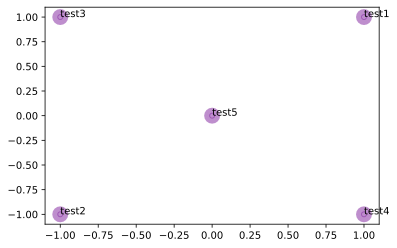

--------------------------------------------------------------------------------


In [46]:
# ---------------------
# Run this sanity check
# Note that this is not an exhaustive check for correctness.
# The plot produced should look like the "test solution plot" depicted below. 
# ---------------------

print ("-" * 80)
print ("Outputted Plot:")

M_reduced_plot_test = np.array([[1, 1], [-1, -1], [1, -1], [-1, 1], [0, 0]])
word2ind_plot_test = {'test1': 0, 'test2': 1, 'test3': 2, 'test4': 3, 'test5': 4}
words = ['test1', 'test2', 'test3', 'test4', 'test5']
plot_embeddings(M_reduced_plot_test, word2ind_plot_test, words)

print ("-" * 80)

### Question 2.5: Co-Occurrence Plot Analysis [written] (3 points)

Now we will put together all the parts you have written! We will compute the co-occurrence matrix with fixed window of 4 (the default window size), over the Reuters "crude" (oil) corpus. Then we will use TruncatedSVD to compute 2-dimensional embeddings of each word. TruncatedSVD returns U*S, so we need to normalize the returned vectors, so that all the vectors will appear around the unit circle (therefore closeness is directional closeness). Note: The line of code below that does the normalizing uses the NumPy concept of broadcasting. If you don't know about broadcasting, check out Computation on Arrays: Broadcasting by Jake VanderPlas.

Run the below cell to produce the plot. It'll probably take a few seconds to run. What clusters together in 2-dimensional embedding space? What doesn't cluster together that you might think should have? Note: "bpd" stands for "barrels per day" and is a commonly used abbreviation in crude oil topic articles.

Running Truncated SVD over 8185 words...
Done.


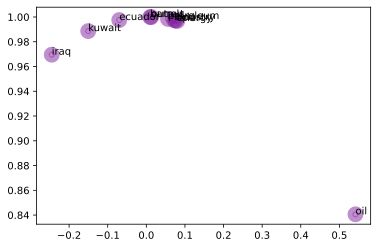

In [47]:
# -----------------------------
# Run This Cell to Produce Your Plot
# ------------------------------
reuters_corpus = read_corpus()
M_co_occurrence, word2ind_co_occurrence = compute_co_occurrence_matrix(reuters_corpus)
M_reduced_co_occurrence = reduce_to_k_dim(M_co_occurrence, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced_co_occurrence, axis=1)
M_normalized = M_reduced_co_occurrence / M_lengths[:, np.newaxis] # broadcasting

words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'iraq']

plot_embeddings(M_normalized, word2ind_co_occurrence, words)

# TODOOOOOOO

# Part 3. Prediction-based word vectors (15 points)

As discussed in class, more recently prediction-based word vectors have demonstrated better performance, such as word2vec and GloVe (which also utilizes the benefit of counts). If you're feeling adventurous, challenge yourself and try reading GloVe's original paper.

Then run the following cells to load the GloVe vectors into memory. Note: If this is your first time to run these cells, i.e. download the embedding model, it will take a couple minutes to run. If you've run these cells before, rerunning them will load the model without redownloading it, which will take about 1 to 2 minutes.

In [81]:
def load_embedding_model():
    """ Load GloVe Vectors
        Return:
            wv_from_bin: All 400000 embeddings, each lengh 200
    """
    import gensim.downloader as api
    wv_from_bin = api.load("glove-wiki-gigaword-200")
    print("Loaded vocab size %i" % len(wv_from_bin.vocab.keys()))
    return wv_from_bin

In [82]:
# -----------------------------------
# Run Cell to Load Word Vectors
# Note: This will take a couple minutes
# -----------------------------------
wv_from_bin = load_embedding_model()

Loaded vocab size 400000


#### Note: If you are receiving a "reset by peer" error, rerun the cell to restart the download.

## Reducing dimensionality of Word Embeddings

Let's directly compare the GloVe embeddings to those of the co-occurrence matrix. In order to avoid running out of memory, we will work with a sample of 10000 GloVe vectors instead. Run the following cells to:

Put 10000 Glove vectors into a matrix M
Run reduce_to_k_dim (your Truncated SVD function) to reduce the vectors from 200-dimensional to 2-dimensional.

In [83]:
def get_matrix_of_vectors(wv_from_bin, required_words=['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'iraq']):
    """ Put the GloVe vectors into a matrix M.
        Param:
            wv_from_bin: KeyedVectors object; the 400000 GloVe vectors loaded from file
        Return:
            M: numpy matrix shape (num words, 200) containing the vectors
            word2ind: dictionary mapping each word to its row number in M
    """
    import random
    words = list(wv_from_bin.vocab.keys())
    print("Shuffling words ...")
    random.seed(224)
    random.shuffle(words)
    words = words[:10000]
    print("Putting %i words into word2ind and matrix M..." % len(words))
    word2ind = {}
    M = []
    curInd = 0
    for w in words:
        try:
            M.append(wv_from_bin.word_vec(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    for w in required_words:
        if w in words:
            continue
        try:
            M.append(wv_from_bin.word_vec(w))
            word2ind[w] = curInd
            curInd += 1
        except KeyError:
            continue
    M = np.stack(M)
    print("Done.")
    return M, word2ind

In [84]:
# -----------------------------------------------------------------
# Run Cell to Reduce 200-Dimensional Word Embeddings to k Dimensions
# Note: This should be quick to run
# -----------------------------------------------------------------
M, word2ind = get_matrix_of_vectors(wv_from_bin)
M_reduced = reduce_to_k_dim(M, k=2)

# Rescale (normalize) the rows to make them each of unit-length
M_lengths = np.linalg.norm(M_reduced, axis=1)
M_reduced_normalized = M_reduced / M_lengths[:, np.newaxis] # broadcasting

Shuffling words ...
Putting 10000 words into word2ind and matrix M...
Done.
Running Truncated SVD over 10010 words...
Done.


### Question 3.1: GloVe Plot Analysis [written] (3 points)

Run the cell below to plot the 2D GloVe embeddings for ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'iraq'].

What clusters together in 2-dimensional embedding space? What doesn't cluster together that you think should have? How is the plot different from the one generated earlier from the co-occurrence matrix? What is a possible cause for the difference?

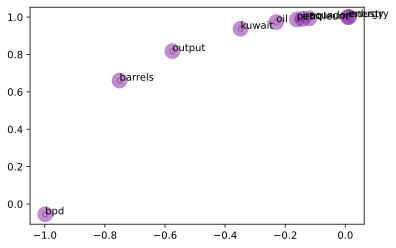

In [85]:
words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'iraq']
plot_embeddings(M_reduced_normalized, word2ind, words)

Write your answer here.
# TODO

## Cosine Similarity

Now that we have word vectors, we need a way to quantify the similarity between individual words, according to these vectors. One such metric is cosine-similarity. We will be using this to find words that are "close" and "far" from one another.

We can think of n-dimensional vectors as points in n-dimensional space. If we take this perspective L1 and L2 Distances help quantify the amount of space "we must travel" to get between these two points. Another approach is to examine the angle between two vectors. From trigonometry we know that:

### Question 3.2: Words with Multiple Meanings (1.5 points) [code + written]

Polysemes and homonyms are words that have more than one meaning (see this wiki page to learn more about the difference between polysemes and homonyms ). Find a word with at least two different meanings such that the top-10 most similar words (according to cosine similarity) contain related words from both meanings. For example, "leaves" has both "go_away" and "a_structure_of_a_plant" meaning in the top 10, and "scoop" has both "handed_waffle_cone" and "lowdown". You will probably need to try several polysemous or homonymic words before you find one.

Please state the word you discover and the multiple meanings that occur in the top 10. Why do you think many of the polysemous or homonymic words you tried didn't work (i.e. the top-10 most similar words only contain one of the meanings of the words)?

Note: You should use the wv_from_bin.most_similar(word) function to get the top 10 similar words. This function ranks all other words in the vocabulary with respect to their cosine similarity to the given word. For further assistance, please check the GenSim documentation.

In [100]:
    # ------------------
    # Write your implementation here.
    # pprint.pprint(wv_from_bin.most_similar('sound')) # Example of failing one
    pprint.pprint(wv_from_bin.most_similar('express'))

    # ------------------

[('expressing', 0.5767321586608887),
 ('expressed', 0.5290095210075378),
 ('train', 0.5205782651901245),
 ('sympathy', 0.5139451622962952),
 ('trains', 0.5050660371780396),
 ('expresses', 0.49935826659202576),
 ('bus', 0.4954938292503357),
 ('regret', 0.49006834626197815),
 ('sorrow', 0.4864082932472229),
 ('travel', 0.47741514444351196)]


Answer: 

It is most probable that since the explored texts are published articles, most polysemous words are used in a certain sense and usually would not appear in both senses. For example '_sound_' which both means safe and a noise is only found as its noise definition. Although, in the case of express we can see that both the speed and transport definitions appear in the top 10.

### Question 3.3: Synonyms & Antonyms (2 points) [code + written]

When considering Cosine Similarity, it's often more convenient to think of Cosine Distance, which is simply 1 - Cosine Similarity.

Find three words  (w1,w2,w3)  where  w1  and  w2  are synonyms and  w1  and  w3  are antonyms, but Cosine Distance  (w1,w3)<  Cosine Distance  (w1,w2) .

As an example,  w1 ="happy" is closer to  w3 ="sad" than to  w2 ="cheerful". Please find a different example that satisfies the above. Once you have found your example, please give a possible explanation for why this counter-intuitive result may have happened.

You should use the the wv_from_bin.distance(w1, w2) function here in order to compute the cosine distance between two words. Please see the GenSim documentation for further assistance.

In [87]:
    # ------------------
    # Write your implementation here.

    w1 = 'hello'
    w2 = 'hi'
    w3 = 'bye'

    cos_w1_w2 = wv_from_bin.distance(w1, w2)
    cos_w1_w3 = wv_from_bin.distance(w1, w3)

    print(f'Cosine Distance w1-w2: {cos_w1_w2}')
    print(f'Cosine Distance w1-w3: {cos_w1_w3}')

    print(f'cosine Distance w1-w3 < w1-w2: {cos_w1_w3 < cos_w1_w2}')
    # ------------------

Cosine Distance w1-w2: 0.6250409185886383
Cosine Distance w1-w3: 0.5616524815559387
cosine Distance w1-w3 < w1-w2: True


Answer:

The cosine distance between two words is a measure of the distance between the vectors representing those words in a vector space. It is calculated by taking the angle between the vectors and converting it to a value between 0 and 1 using the formula 1 - cos(angle). Cosine distance ranges from 0 to 1, with a value of 0 indicating that the vectors are identical and a value of 1 indicating that the vectors are completely opposite.

It is possible for the cosine distance between the words "hello" and "bye" to be lower than the cosine distance between the words "hello" and "hi," even though "bye" and "hello" are antonyms and "hi" and "hello" are synonyms, depending on the vectors that are used to represent these words in a vector space.

If the vectors for the words "hello" and "hi" are pointing in similar directions, and the vectors for the words "hello" and "bye" are also pointing in similar directions, but more similar than the vectors for "hello" and "hi," the cosine distance between "hello" and "bye" will be lower than the cosine distance between "hello" and "hi." This could happen if the vectors for "bye" and "hello" are more similar to each other than the vectors for "hi" and "hello," for example.

It's worth noting that the exact cosine distance between two words can vary depending on the context in which they are used and the other words that appear in the same context. In some cases, two words that are normally considered very different might have a lower cosine distance if they are used in similar contexts or if there are other words present that make the vectors for those words more similar.

### Question 3.4: Analogies with Word Vectors [written] (1.5 points)

Word vectors have been shown to sometimes exhibit the ability to solve analogies.

As an example, for the analogy "man : king :: woman : x" (read: man is to king as woman is to x), what is x?

In the cell below, we show you how to use word vectors to find x using the most_similar function from the GenSim documentation. The function finds words that are most similar to the words in the positive list and most dissimilar from the words in the negative list (while omitting the input words, which are often the most similar; see this paper). The answer to the analogy will have the highest cosine similarity (largest returned numerical value).

In [88]:
# Run this cell to answer the analogy -- man : king :: woman : x
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'king'], negative=['man']))

[('queen', 0.6978678703308105),
 ('princess', 0.6081745028495789),
 ('monarch', 0.5889754891395569),
 ('throne', 0.5775108933448792),
 ('prince', 0.5750998854637146),
 ('elizabeth', 0.546359658241272),
 ('daughter', 0.5399125814437866),
 ('kingdom', 0.5318052768707275),
 ('mother', 0.5168544054031372),
 ('crown', 0.5164472460746765)]


Let  m ,  k ,  w , and  x  denote the word vectors for man, king, woman, and the answer, respectively. Using only vectors  m ,  k ,  w , and the vector arithmetic operators  +  and  −  in your answer, what is the expression in which we are maximizing cosine similarity with  x ?

Hint: Recall that word vectors are simply multi-dimensional vectors that represent a word. It might help to draw out a 2D example using arbitrary locations of each vector. Where would man and woman lie in the coordinate plane relative to king and the answer?

Answer:

x = k - m + w

### Question 3.5: Finding Analogies [code + written] (1.5 points)

Find an example of analogy that holds according to these vectors (i.e. the intended word is ranked top). In your solution please state the full analogy in the form x:y :: a:b. If you believe the analogy is complicated, explain why the analogy holds in one or two sentences.

Note: You may have to try many analogies to find one that works!

In [113]:
    # ------------------
    # Write your implementation here.
    
    # Run this cell to answer the analogy -- man : prince :: woman : x
    print('First analogy: "man : prince :: woman : x":')
    pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'prince'], negative=['man']))

    # Run this cell to answer the analogy -- girl : sister :: boy : x
    print('\nSecond Analogy: "girl : sister :: boy : x": ')
    pprint.pprint(wv_from_bin.most_similar(positive=['boy', 'sister'], negative=['girl']))
    # ------------------

First analogy: "man : prince :: woman : x":
[('princess', 0.7453499436378479),
 ('duchess', 0.6067375540733337),
 ('daughter', 0.5600142478942871),
 ('queen', 0.5452842712402344),
 ('hrh', 0.5299034118652344),
 ('wife', 0.5115962028503418),
 ('marry', 0.5082696676254272),
 ('naruhito', 0.5037658214569092),
 ('mistress', 0.5026963949203491),
 ('crown', 0.4981675446033478)]

Second Analogy: "girl : sister :: boy : x": 
[('brother', 0.7562326192855835),
 ('father', 0.7254698276519775),
 ('mother', 0.7100989818572998),
 ('son', 0.7058944702148438),
 ('cousin', 0.7000033855438232),
 ('daughter', 0.6871263384819031),
 ('uncle', 0.6804952025413513),
 ('siblings', 0.677232027053833),
 ('elder', 0.6522819995880127),
 ('nephew', 0.6461338996887207)]


Answer:

Both `man : prince :: woman : x` and  `girl : sister :: boy : x` correctly identify the analogies. We thus have the feminine version of `prince` being `princess` and the masculine version of `sister` being `brother`.

### Question 3.6: Incorrect Analogy [code + written] (1.5 points)

Find an example of analogy that does not hold according to these vectors. In your solution, state the intended analogy in the form x:y :: a:b, and state the (incorrect) value of b according to the word vectors.

In [128]:
    # ------------------
    # Write your implementation here.

    # Run this cell to answer the analogy -- woman : wife :: man : b 
    # --> b should be husband
    print('First analogy: "woman : wife :: man : b":')
    missed_1 = wv_from_bin.most_similar(positive=['man', 'wife'], negative=['woman'])
    pprint.pprint(missed_1)
    print(f'Got "{missed_1[0][0]}" when expected "husband".')

    # Run this cell to answer the analogy -- girl : brother :: boy : b
    # --> b should be sister
    print('\nSecond Analogy: "girl : brother :: boy : b": ')
    missed_2 = wv_from_bin.most_similar(positive=['girl', 'brother'], negative=['boy'])
    pprint.pprint(missed_2)
    print(f'Got "{missed_2[0][0]}" when expected "sister".')
    # ------------------

First analogy: "woman : wife :: man : b":
[('father', 0.7467501163482666),
 ('brother', 0.745741069316864),
 ('husband', 0.7437037825584412),
 ('son', 0.7166001796722412),
 ('friend', 0.7085943222045898),
 ('his', 0.6684678792953491),
 ('cousin', 0.6388828754425049),
 ('daughter', 0.6335204243659973),
 ('mother', 0.6283376216888428),
 ('uncle', 0.6279417276382446)]
Got "father" when expected "husband".

Second Analogy: "girl : brother :: boy : b": 
[('daughter', 0.8058238625526428),
 ('cousin', 0.7796305418014526),
 ('son', 0.7571232914924622),
 ('wife', 0.7448716163635254),
 ('sister', 0.7441308498382568),
 ('father', 0.7369656562805176),
 ('niece', 0.7302137613296509),
 ('nephew', 0.7301906943321228),
 ('husband', 0.7162861824035645),
 ('mother', 0.7117223739624023)]
Got "daughter" when expected "sister".


Answer:

Both `woman : wife :: man : b` and  `girl : brother :: boy : b` wrongly identified the analogies. We thus have the feminine version of `brother` being `daughter` instead of `sister` and the masculine version of `wife` being `father` instead of `husband`.

### Question 3.7: Guided Analysis of Bias in Word Vectors [written] (1 point)

It's important to be cognizant of the biases (gender, race, sexual orientation etc.) implicit in our word embeddings. Bias can be dangerous because it can reinforce stereotypes through applications that employ these models.

Run the cell below, to examine (a) which terms are most similar to "woman" and "worker" and most dissimilar to "man", and (b) which terms are most similar to "man" and "worker" and most dissimilar to "woman". Point out the difference between the list of female-associated words and the list of male-associated words, and explain how it is reflecting gender bias.

In [91]:
# Run this cell
# Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
# most dissimilar from.
pprint.pprint(wv_from_bin.most_similar(positive=['woman', 'worker'], negative=['man']))
print()
pprint.pprint(wv_from_bin.most_similar(positive=['man', 'worker'], negative=['woman']))

[('employee', 0.6375863552093506),
 ('workers', 0.6068919897079468),
 ('nurse', 0.5837947726249695),
 ('pregnant', 0.5363885164260864),
 ('mother', 0.5321309566497803),
 ('employer', 0.5127025842666626),
 ('teacher', 0.5099576711654663),
 ('child', 0.5096741914749146),
 ('homemaker', 0.5019454956054688),
 ('nurses', 0.4970572590827942)]

[('workers', 0.6113258004188538),
 ('employee', 0.5983108282089233),
 ('working', 0.5615328550338745),
 ('laborer', 0.5442320108413696),
 ('unemployed', 0.5368517637252808),
 ('job', 0.5278826951980591),
 ('work', 0.5223963260650635),
 ('mechanic', 0.5088937282562256),
 ('worked', 0.505452036857605),
 ('factory', 0.4940453767776489)]


Answer:

The list of female-associated words includes terms such as "nurse," "mother," "teacher," and "homemaker," which are often traditionally considered to be female-dominated occupations or roles. The list of male-associated words includes terms such as "mechanic" and "laborer," which are also traditionally considered to be male-dominated occupations or roles.

This difference between the two lists reflects gender bias, as it reflects the societal biases and stereotypes that have been encoded in the data used to train the word embeddings. These biases can have harmful consequences, as they can reinforce and perpetuate harmful stereotypes and discriminate against certain groups of people. It is important to be aware of these biases and take steps to mitigate them in any application that uses word embeddings or other language models.

###  Question 3.8: Independent Analysis of Bias in Word Vectors [code + written] (1 point)

Use the most_similar function to find another case where some bias is exhibited by the vectors. Please briefly explain the example of bias that you discover.

In [131]:
    # ------------------
    # Write your implementation here.

    word_to_compare = "wealthy"

    # Here `positive` indicates the list of words to be similar to and `negative` indicates the list of words to be
    # most dissimilar from.
    pprint.pprint(wv_from_bin.most_similar(positive=['woman', word_to_compare], negative=['man']))
    print()
    pprint.pprint(wv_from_bin.most_similar(positive=['man', word_to_compare], negative=['woman']))

    # ------------------

[('affluent', 0.6492576599121094),
 ('socialite', 0.5705443024635315),
 ('middle-class', 0.5464404225349426),
 ('aristocratic', 0.5330350399017334),
 ('businesswoman', 0.5314464569091797),
 ('marry', 0.5257409811019897),
 ('wealthier', 0.5169167518615723),
 ('elderly', 0.5112395882606506),
 ('marrying', 0.510892927646637),
 ('married', 0.5068483948707581)]

[('wealthiest', 0.6119896173477173),
 ('businessman', 0.5537059307098389),
 ('rich', 0.5525563955307007),
 ('businessmen', 0.5454820394515991),
 ('affluent', 0.5427639484405518),
 ('richest', 0.5321693420410156),
 ('tycoons', 0.5197821855545044),
 ('billionaire', 0.5065683126449585),
 ('millionaire', 0.49499309062957764),
 ('fortune', 0.4918596148490906)]


Answer:

The list of female-associated words includes terms such as `marry` and `marrying`, `married` ,which are often traditionally associated with wealthy women. Supposing that woman cannot make their own money and have to rely on men which is completely false. The list of male-associated words includes terms such as `businessman`, `tycoons`, `affluent`, and `billionaire`, which are also traditionally associated with men and wealth. But this time putting glory on the men again. This is hugely biased because a man could be a `son` or a `husband` as much as a woman can be a `businesswoman` or `affluent` of her own right.

### Question 3.9: Thinking About Bias [written] (2 points)

Give one explanation of how bias gets into the word vectors. What is an experiment that you could do to test for or to measure this source of bias?

Write your answer here.

Answer:

One way that bias can get into word vectors is through the data that is used to train the word embedding model. If the data used to train the model reflects societal biases and stereotypes, then the word vectors produced by the model may also reflect these biases.

One experiment that could be used to test for or measure this source of bias is to evaluate the word vectors on a set of benchmarks specifically designed to measure bias. There are several such benchmarks available, such as the Word Embedding Association Test (WEAT) and the Word Embedding Association Test for Gender (WEAT-G). These benchmarks allows one to quantitatively measure the degree of bias present in a given set of word vectors by comparing the similarity between pairs of words that are related to a particular bias (e.g. gender, race, sexual orientation, etc.) against the similarity between pairs of words that are not related to that bias.

Another way to test for or measure bias in word vectors is to manually examine the most similar words for a given word and see if the resulting list reflects societal biases and stereotypes. For example, if we find that the most similar words for the word "woman" include terms such as "nurse," "homemaker," and "secretary," while the most similar words for the word "man" include terms such as "businessman," "engineer," and "doctor," this may indicate that the word vectors are reflecting societal biases and stereotypes about the roles and occupations of men and women, which is what we have observed in this practical.




# Part 4. Prediction-based sentence vectors (13 points)

Sentence embeddings are a more powerful representation than word embeddings. They allow you to have out-of-the-box sentence representation of sequences of tokens which is closer to what you would have in reality.

### Question 4.1: How would you represent a sentence with Glove? What are the limits of your proposed implementation? [written] (3 points)

Write your answer here.

### Installation

In [93]:
%%capture
!pip install -U sentence-transformers

In [94]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import numpy as np 

In [95]:
def load_embedding_model():
    """ Load SentenceBERT Vectors
        Return:
            embedder: sentence embedder 
    """
    from sentence_transformers import SentenceTransformer
    
    embedder = SentenceTransformer('all-MiniLM-L6-v2')
    return embedder

In [96]:
%%capture
embedder = load_embedding_model()

Inspired by the above, choose the appropriate way to plot the below clusters. Do they make sense to you? What would you improve to get a meaningful plot?

### Question 4.2. Evaluate clustering quality of SentenceBERT. What makes it good at clustering sentences? Which method of the two below would you go for? [written] (3 points)

In [97]:
# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]
corpus_embeddings = embedder.encode(corpus)

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in enumerate(clustered_sentences):
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  2
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']

Cluster  3
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  4
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  5
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']



In [98]:
# Corpus with example sentences
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'A man is eating pasta.',
          'The girl is carrying a baby.',
          'The baby is carried by the woman',
          'A man is riding a horse.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'Someone in a gorilla costume is playing a set of drums.',
          'A cheetah is running behind its prey.',
          'A cheetah chases prey on across a field.'
          ]
corpus_embeddings = embedder.encode(corpus)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

# Perform kmean clustering
clustering_model = AgglomerativeClustering(n_clusters=None, distance_threshold=1.5) #, affinity='cosine', linkage='average', distance_threshold=0.4)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

for i, cluster in clustered_sentences.items():
    print("Cluster ", i+1)
    print(cluster)
    print("")

Cluster  1
['A man is eating food.', 'A man is eating a piece of bread.', 'A man is eating pasta.']

Cluster  5
['The girl is carrying a baby.', 'The baby is carried by the woman']

Cluster  2
['A man is riding a horse.', 'A man is riding a white horse on an enclosed ground.']

Cluster  3
['A monkey is playing drums.', 'Someone in a gorilla costume is playing a set of drums.']

Cluster  4
['A cheetah is running behind its prey.', 'A cheetah chases prey on across a field.']



### Question 4.3: SentenceBERT Plot Analysis [written] (3 points)

Plot the above corpus with your favorite method in a 2-dimensional space. Comment on the output. 

In [99]:
# TO Modify with actual correct values
#words = ['barrels', 'bpd', 'ecuador', 'energy', 'industry', 'kuwait', 'oil', 'output', 'petroleum', 'iraq']
#plot_embeddings(M_reduced_normalized, word2ind, words)

### Question 4.4: Independent Analysis of Bias in Word Vectors [code + written] (4 points) 

Select a corpus of interest, or examples of interest and shed light on one source of bias from SentenceBERT.